- break bounding box into grid
- record every voxel center
- compute distance voxel center from mesh
- marching on voxel grid

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import igl
from meshplot import plot

In [2]:
def get_cube(x,y,z,delta):
#     print(x,y,z,delta)
    return np.array([[x+delta, y+delta, z], [x+delta, y, z], [x, y, z], [x, y+delta,z],\
        [x, y+delta, z+delta], [x,y,z+delta], [x+delta, y+delta, z+delta],[x+delta,y,z+delta]])

In [3]:
def create_grid( bounds, delta=1):
    min_bounds = bounds[0]
    max_bounds = bounds[1]
    x_b = round((max_bounds[0] - min_bounds[0])/delta+1)
    y_b = round((max_bounds[1] - min_bounds[1])/delta+1)
    z_b = round((max_bounds[2] - min_bounds[2])/delta+1)
    grid_cells = []
    centers = []
    points  = []

#     print(bounds)
    for i in range(x_b-1):
        for j in range(y_b-1):
            for k in range(z_b-1) :
                x = min_bounds[0] + i * delta
                y = min_bounds[1] + j * delta
                z = min_bounds[2] + k * delta
                points.append([x,y,z])
                grid_cube = get_cube(x,y,z,delta)
                center = grid_cube.mean(0)
                centers.append(center)
                grid_cells.append(grid_cube)
    
    return np.array(grid_cells), np.array(centers), np.array(points),[x_b-1,y_b-1,z_b-1]

In [4]:
bounds = np.array([[0., 0., 0.], [2.5, 2.5, 2.5]])
grid_cells,centers,points,sizes = create_grid(bounds)
print(grid_cells.shape, centers.shape, points.shape)

(27, 8, 3) (27, 3) (27, 3)


In [5]:
v,t,f = igl.read_mesh('bunny.mesh')

zmin = v[:,-1].min() #+ 0.1 * v[:,-1].min()
zmax = v[:,-1].max() #+ 0.1 * v[:,-1].max()
ymin = v[:,-2].min() #+ 0.1 * v[:,-2].min() 
ymax = v[:, -2].max() #+ 0.1 * v[:, -2].max() 
xmin = v[:, -3].min() #+ 0.1 * v[:, -3].min() 
xmax = v[:, -3].max() #+ v[:, -3].max()

In [18]:
bounds = np.array([[xmin, ymin, zmin], [xmax, ymax, zmax]]) # bounds for bunny
grid_cells,centers,points,sizes = create_grid(bounds,delta=0.004) #0.004-0.009

### Signed Distance Field
![signed distance](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFzpcjrhR0Qivr-89wvmof4gDN-5ylSXRrSQ&usqp=CAU)

In [19]:
d = igl.signed_distance(centers, v, f)

In [20]:
c_reshape = d[0].reshape((sizes[0],sizes[1],sizes[2]))

In [21]:
c_reshape.shape

(39, 39, 30)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016860…

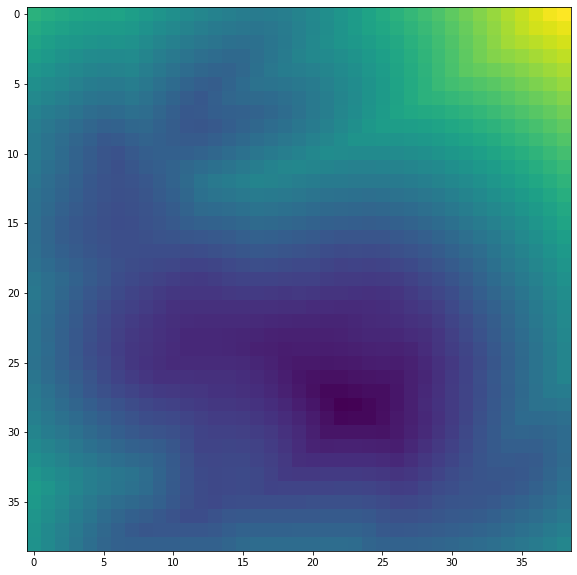

In [22]:
fig= plt.figure(figsize=(10,10))
plot(v,f)
plt.imshow(np.rot90(c_reshape[:,:,15]))

In [23]:
from skimage import measure

### Marching Cubes
![marching cubes](http://www.cs.utah.edu/~whitaker/sceneRecon/pics/sparse-field4.gif)

In [24]:

verts, faces, normals, values = measure.marching_cubes(c_reshape,0)

In [26]:
plot(verts, faces)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(19.0, 18.…

In [ ]:
voxel = 3dconv
point clouds = conv1d
mesh = geometric deep learning (vertices, adjacency) 